# 1 Teste de Permutação I
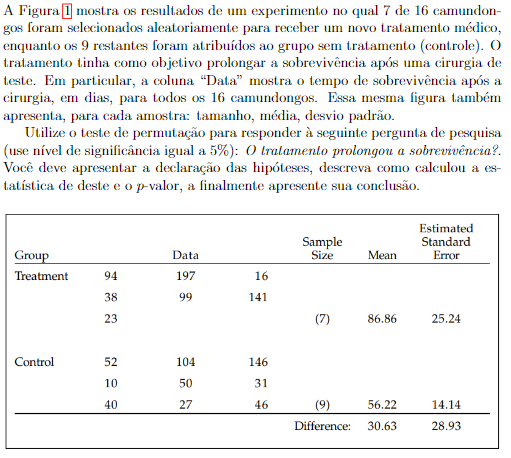

In [41]:
library(MASS)

tratamento <- c(94, 38, 23, 197, 99, 16, 141)
controle <- c(52,10,40,104, 50, 27, 146, 31, 46)

tamanho_tratamento <- length(tratamento)
tamanho_controle <- length(controle)

media_tratamento <- round(mean(tratamento),2)
media_controle <- round(mean(controle),2)

medias_diff <- abs(media_tratamento - media_controle)

dados_combinados<- c(tratamento, controle)

num_permutacoes <- 10000

diferencas_permutacoes <- numeric(num_permutacoes)
for (i in 1:num_permutacoes) {
  # Permutar os dados
  dados_combinados <- sample(dados_combinados)

  # Dividir os dados em tratamento e controle
  dados_tratamento <- dados_combinados[1:tamanho_tratamento]
  dados_controle <- dados_combinados[(tamanho_tratamento + 1):length(dados_combinados)]

  # Calcular a média para cada grupo
  media_tratamento_perm <- mean(dados_tratamento)
  media_controle_perm <- mean(dados_controle)

  # Calcular a diferença absoluta das médias permutadas
  diferenca_perm <- abs(media_tratamento_perm - media_controle_perm)

  # Armazenar a diferença no vetor
  diferencas_permutacoes[i] <- diferenca_perm
}

estatistica_teste <- mean(diferencas_permutacoes)

p_valor <- mean(diferencas_permutacoes >= medias_diff)

# Imprimir os resultados
cat("Média Tratamento:", media_tratamento, "\n")
cat("Média Controle:", media_controle, "\n")
cat("Diferença Observada:", medias_diff, "\n")
cat("Estatística de Teste:", estatistica_teste, "\n")
cat("p-valor:", p_valor, "\n")

# Comparar o p-valor com o nível de significância
if (p_valor < 0.05) {
  cat("Rejeitar a hipótese nula. O tratamento prolongou a sobrevivência.\n")
} else {
  cat("Aceitar a hipótese nula. Não há evidências suficientes para concluir que o tratamento prolongou a sobrevivência.\n")
}

Média Tratamento: 86.86 
Média Controle: 56.22 
Diferença Observada: 30.64 
Estatística de Teste: 22.43677 
p-valor: 0.2788 
Aceitar a hipótese nula. Não há evidências suficientes para concluir que o tratamento prolongou a sobrevivência.


Inicialmente, são calculadas as médias observadas para ambos os grupos, bem como a diferença absoluta entre essas médias.

Os dados dos dois grupos são combinados em um único array, e esse código utiliza um loop para realizar permutações aleatórias dos dados entre os grupos. Em cada permutação, as médias permutadas são calculadas para os grupos de tratamento e controle, e a diferença absoluta entre essas médias é registrada.

Esse processo de permutação é repetido 10.000 vezes para criar uma distribuição de diferenças permutadas. A estatística de teste é então calculada como a média dessas diferenças permutadas.

O p-valor é determinado ao avaliar a proporção de diferenças permutadas que são maiores ou iguais à diferença observada.

O resultado apresenta um p-valor de 0.2718, que é maior que o nível de significância de 0.05. Portanto, com base nesse teste de permutação, não há evidências estatísticas para sugerir que o tratamento teve um efeito significativo na sobrevivência em comparação com o grupo de controle.

# 2 Bootstrap I
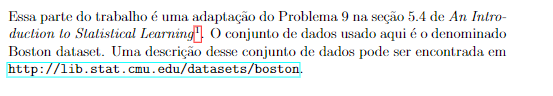

## 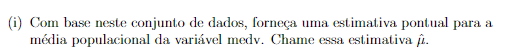

In [2]:
media_medv <- mean(Boston$medv)

Calculando a media populacional com a função mean.

image.png

In [29]:
erro_padrao<- sd(Boston$medv)/sqrt(length(Boston$medv))
print(erro_padrao)

[1] 0.4088611


O erro padrão é calculado com o desvio padrão dividido pela raiz quadrada do tamanho da amostra.

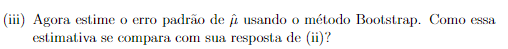

In [6]:
n_iterations <- 1000

bootstrap_means <- numeric(n_iterations)

for (i in 1:n_iterations) {

  bootstrap_sample <- sample(Boston$medv, replace = TRUE)

  bootstrap_mean <- mean(bootstrap_sample)


  bootstrap_means[i] <- bootstrap_mean
}
bootstrap_means <- sd(bootstrap_means)

cat("Desvio padrão das médias bootstrap:", bootstrap_means, "\n")

Desvio padrão das médias bootstrap: 0.407379 


O código começa definindo o número de iterações para o procedimento de bootstrap (n_iterations). Em seguida, um vetor vazio chamado bootstrap_means é inicializado para armazenar as médias amostrais resultantes de cada iteração.

A cada iteração no for, uma amostra bootstrap é obtida a partir da variável medv do conjunto de dados Boston. A amostragem é realizada com reposição, o que significa que uma observação pode ser selecionada mais de uma vez.

Para cada amostra bootstrap, a média é calculada e armazenada no vetor bootstrap_means.

Após completar todas as iterações, o desvio padrão das médias bootstrap é calculado. Isso fornece uma estimativa da variabilidade das médias amostrais obtidas por meio do procedimento de bootstrap.
O resultado final é a impressão do desvio padrão das médias bootstrap. Este valor representa a variabilidade esperada nas médias amostrais quando amostras são retiradas repetidamente do conjunto de dados original.

E em comparação com os valor descoberto na questão passado, podemos ver que eles são bem parecidos, o que mostra a confiabilidade dessa técnica.

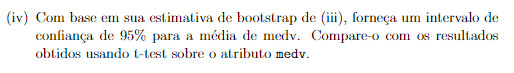

In [31]:
alpha <- 0.05

bootstrap_ci <- quantile(bootstrap_means, c(alpha/2, 1 - alpha/2))

print(bootstrap_ci)

    2.5%    97.5% 
0.407379 0.407379 


E em comparação com os valor descoberto na questão passado, podemos ver que eles são bem parecidos, o que mostra a confiabilidade dessa técnica.

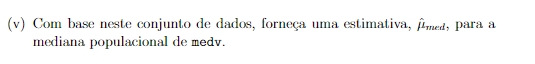

In [35]:
mediana_medv <- median(Boston$medv)
print(mediana_medv)

[1] 21.2


Utilizado a função median para calcular a mediana populacional de medv.

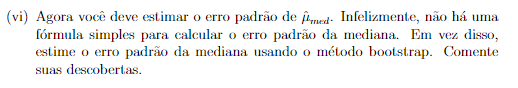

In [33]:
bootstrap_medians <- numeric(n_iterations)

for (i in 1:n_iterations) {

  bootstrap_sample <- sample(Boston$medv, replace = TRUE)

  bootstrap_median <- median(bootstrap_sample)


  bootstrap_medians[i] <- bootstrap_median
}

bootstrap_median <- sd(bootstrap_medians)

print(bootstrap_median)


[1] 0.3838822


Nesse código é utilizado a mesma técnica, mas agora para a mediana indicando a variabilidade das medianas.

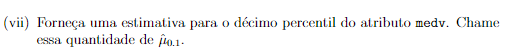

In [37]:
u_01_hat <- quantile(Boston$medv, 0.1)

print(u_01_hat)


  10% 
12.75 


Estimativa para o décimo percentil do atributo medv no conjunto de dados Boston.

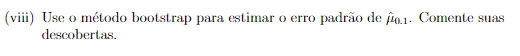

In [39]:
bootstrap_01 <- numeric(n_iterations)

for (i in 1:n_iterations) {

  bootstrap_sample <- sample(Boston$medv, replace = TRUE)

  bootstrap_01_val <- quantile(bootstrap_sample, 0.1)

  bootstrap_01[i] <- bootstrap_01_val
}

bootstrap_01_se <- sd(bootstrap_01)

print(bootstrap_01_se)

[1] 0.5070188


Foi feito a mesma coisa que já havia sido feito para a media e mediana, mas agora para o décimo percentil.

# 3 Bootstrap II
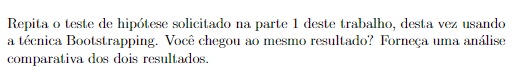

In [40]:
diferencas_bootstrap <- numeric(num_bootstrap)

for (i in 1:num_bootstrap) {

  amostra_tratamento <- sample(tratamento, size = tamanho_tratamento, replace = TRUE)
  amostra_controle <- sample(controle, size = tamanho_controle, replace = TRUE)

  media_tratamento_bs <- mean(amostra_tratamento)
  media_controle_bs <- mean(amostra_controle)

  diferenca_bs <- media_tratamento_bs - media_controle_bs


  diferencas_bootstrap[i] <- diferenca_bs
}

p_valor <- mean(diferencas_bootstrap >= medias_diff)

cat("Diferença Observada:", medias_diff, "\n")
cat("p-valor (Bootstrap):", p_valor, "\n")

if (p_valor < 0.05) {
  cat("Rejeitar a hipótese nula. O tratamento prolongou a sobrevivência.\n")
} else {
  cat("Aceitar a hipótese nula. Não há evidências suficientes para concluir que o tratamento prolongou a sobrevivência.\n")
}

Diferença Observada: 30.64 
p-valor (Bootstrap): 0.4921 
Aceitar a hipótese nula. Não há evidências suficientes para concluir que o tratamento prolongou a sobrevivência.



O código começa inicializando um vetor vazio chamado diferencas_bootstrap para armazenar as diferenças entre as médias obtidas nas amostras bootstrap.

Em um loop for, amostras bootstrap são criadas para ambos os grupos de tratamento e controle. As médias dessas amostras são calculadas, e a diferença entre essas médias é armazenada no vetor diferencas_bootstrap.

Após completar todas as iterações do bootstrap, o p-valor é calculado como a proporção de diferenças bootstrap que são maiores ou iguais à diferença observada.

E tem como o pvalue encontrado de 0.4921 em comparação a 0.2788 encontrado anteriormente, os dois resultado mostram que não há evidências suficientes para concluir que o tratamento prolongou a sobrevivência.

# 4 Teste de Permutação vs Teste Bootstrap - I
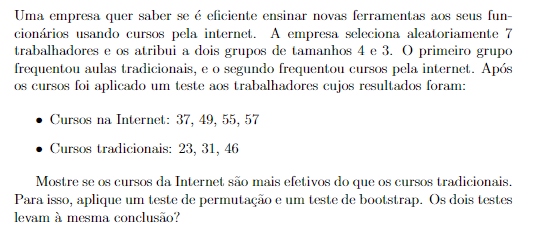

In [46]:
cursos_internet <- c(37, 49, 55, 57)
cursos_tradicionais <- c(23, 31, 46)

media_internet <- mean(cursos_internet)
media_tradicionais <- mean(cursos_tradicionais)

diferenca_obs <- media_internet - media_tradicionais

todos_resultados <- c(cursos_internet, cursos_tradicionais)

num_permutacoes <- 10000

diferencas_permutacao <- numeric(num_permutacoes)

for (i in 1:num_permutacoes) {
  todos_resultados <- sample(todos_resultados)

  media_internet_permutada <- mean(todos_resultados[1:length(cursos_internet)])
  media_tradicionais_permutada <- mean(todos_resultados[(length(cursos_internet) + 1):length(todos_resultados)])


  diferenca_permutada <- media_internet_permutada - media_tradicionais_permutada

  diferencas_permutacao[i] <- diferenca_permutada
}

p_valor_permutacao <- mean(diferencas_permutacao >= diferenca_obs)

num_bootstrap <- 10000

diferencas_bootstrap <- numeric(num_bootstrap)

for (i in 1:num_bootstrap) {

  amostra_internet <- sample(cursos_internet, size = length(cursos_internet), replace = TRUE)
  amostra_tradicionais <- sample(cursos_tradicionais, size = length(cursos_tradicionais), replace = TRUE)

  media_internet_bs <- mean(amostra_internet)
  media_tradicionais_bs <- mean(amostra_tradicionais)

  diferenca_bs <- media_internet_bs - media_tradicionais_bs


  diferencas_bootstrap[i] <- diferenca_bs
}

p_valor_bootstrap <- mean(diferencas_bootstrap >= diferenca_obs)

nivel_significancia <- 0.05

cat("Diferença Observada:", diferenca_obs, "\n")
cat("p-valor (Permutação):", p_valor_permutacao, "\n")
cat("p-valor (Bootstrap):", p_valor_bootstrap, "\n")

if (p_valor_permutacao < nivel_significancia & p_valor_bootstrap < nivel_significancia) {
  cat("Ambos os testes rejeitam a hipótese nula. Os cursos da Internet são mais efetivos do que os cursos tradicionais.\n")
} else if (p_valor_permutacao < nivel_significancia) {
  cat("O teste de permutação rejeita a hipótese nula. Os cursos da Internet são mais efetivos do que os cursos tradicionais.\n")
} else if (p_valor_bootstrap < nivel_significancia) {
  cat("O teste de bootstrap rejeita a hipótese nula. Os cursos da Internet são mais efetivos do que os cursos tradicionais.\n")
} else {
  cat("Ambos os testes aceitam a hipótese nula. Não há evidências suficientes para concluir que os cursos da Internet são mais efetivos do que os cursos tradicionais.\n")
}

Diferença Observada: 16.16667 
p-valor (Permutação): 0.0579 
p-valor (Bootstrap): 0.5301 
Ambos os testes aceitam a hipótese nula. Não há evidências suficientes para concluir que os cursos da Internet são mais efetivos do que os cursos tradicionais.


É utilizado uma comparação entre a técnica de bootstraping e permutação, a primiera utilizada é a de permutação já explicada anteriormente, após isso é utilizado a de Bootstrap.

Os dois resultados têm a mesma conclusão existente, o fato de que não é possível concluir que os cursos da internet são mais efetivos.

# 5 Teste de Permutação vs Teste Bootstrap - II
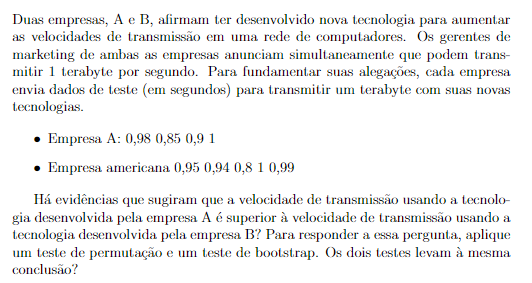

In [49]:
empresa_a <- c(0.98, 0.85, 0.9, 1)
empresa_b <- c(0.95, 0.94, 0.8, 1, 0.99)

media_a <- mean(empresa_a)
media_b <- mean(empresa_b)

diferenca_obs <- media_a - media_b

todos_dados <- c(empresa_a, empresa_b)

num_permutacoes <- 10000

diferencas_permutacao <- numeric(num_permutacoes)

for (i in 1:num_permutacoes) {

  todos_dados <- sample(todos_dados)

  media_a_permutada <- mean(todos_dados[1:length(empresa_a)])
  media_b_permutada <- mean(todos_dados[(length(empresa_a) + 1):length(todos_dados)])

  diferenca_permutada <- media_a_permutada - media_b_permutada

  diferencas_permutacao[i] <- diferenca_permutada
}

p_valor_permutacao <- mean(diferencas_permutacao >= diferenca_obs)

num_bootstrap <- 10000

diferencas_bootstrap <- numeric(num_bootstrap)

for (i in 1:num_bootstrap) {

  amostra_a <- sample(empresa_a, size = length(empresa_a), replace = TRUE)
  amostra_b <- sample(empresa_b, size = length(empresa_b), replace = TRUE)

  media_a_bs <- mean(amostra_a)
  media_b_bs <- mean(amostra_b)

  diferenca_bs <- media_a_bs - media_b_bs

  diferencas_bootstrap[i] <- diferenca_bs
}

p_valor_bootstrap <- mean(diferencas_bootstrap >= diferenca_obs)

nivel_significancia <- 0.05

cat("Diferença Observada:", diferenca_obs, "\n")
cat("p-valor (Permutação):", p_valor_permutacao, "\n")
cat("p-valor (Bootstrap):", p_valor_bootstrap, "\n")

if (p_valor_permutacao < nivel_significancia & p_valor_bootstrap < nivel_significancia) {
  cat("Ambos os testes rejeitam a hipótese nula. A velocidade de transmissão usando a tecnologia da empresa A é superior à velocidade da empresa B.\n")
} else if (p_valor_permutacao < nivel_significancia) {
  cat("O teste de permutação rejeita a hipótese nula. Não há evidências suficientes para concluir que a velocidade de transmissão usando a tecnologia da empresa A é superior à velocidade da empresa B.\n")
} else if (p_valor_bootstrap < nivel_significancia) {
  cat("O teste de bootstrap rejeita a hipótese nula. Não há evidências suficientes para concluir que a velocidade de transmissão usando a tecnologia da empresa A é superior à velocidade da empresa B.\n")
} else {
  cat("Ambos os testes aceitam a hipótese nula. Não há evidências suficientes para concluir que a velocidade de transmissão usando a tecnologia da empresa A é superior à velocidade da empresa B.\n")
}


Diferença Observada: -0.0035 
p-valor (Permutação): 0.5524 
p-valor (Bootstrap): 0.4921 
Ambos os testes aceitam a hipótese nula. Não há evidências suficientes para concluir que a velocidade de transmissão usando a tecnologia da empresa A é superior à velocidade da empresa B.


É utilizado uma comparação entre a técnica de bootstraping e permutação, a primiera utilizada é a de permutação já explicada anteriormente, após isso é utilizado a de Bootstrap.

Os dois resultados têm a mesma conclusão existente, o fato de que não é possível concluir que a velocidade de transmissao usando a tecnologia da empresa A é superior que a velocidade da empresa B.

# 6 Regressão Linear
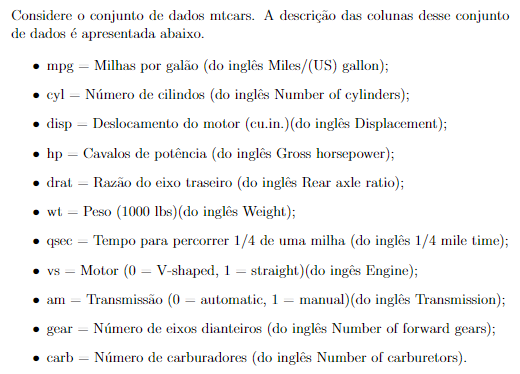

image.png

In [52]:
library(tidyverse)
matriz_de_correlacao <- cor(mtcars, method = 'pearson')
matriz_de_correlacao %>% View()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


É utilizado a função cor para criar a matriz de correlação da base de dados mtcars e utilizando o metodo de pearson.

image.png

mpg tem uma forte correlação negativa com cyl (-0.8522), o número de cilindros aumenta, a variável mpg tende a diminuir.

mpg tem uma forte correlação negativa com disp (-0.8476), sugerindo que a variavel o disp aumenta e a mpg diminui e vice versa.

mpg tem uma forte correlação negativa com hp (-0.7762), sugerindo que a variavel o hp aumenta e a mpg diminui e vice versa.

mpg tem uma correlação positiva moderada com drat (0.6812), sugerindo que a variavel drat aumenta e a mpg tende a aumentar também e vice versa.

mpg tem uma forte correlação negativa com wt (-0.8677), sugerindo que a variavel o wt aumenta e a mpg diminui e vice versa.

mpg tem uma correlação positiva moderada com qsec (0.4187), sugerindo que a variavel qsec aumenta e a mpg tende a aumentar também e vice versa.

mpg tem uma correlação positiva moderada com vs (0.6640),sugerindo que a variavel vs aumenta e a mpg tende a aumentar também e vice versa.

mpg tem uma correlação positiva moderada com am (0.5998), sugerindo que a variavel am aumenta e a mpg tende a aumentar também e vice versa.

mpg tem uma correlação positiva moderada com gear (0.4803), sugerindo que a variavel gear aumenta e a mpg tende a aumentar também e vice versa.

mpg tem uma forte correlação negativa com carb (-0.5509), sugerindo que a variavel o carp aumenta e a mpg diminui e vice versa.

cyl tem uma forte correlação negativa com mpg (-0.8522), sugerindo que a variavel o mpg aumenta e a cyl diminui e vice versa.

cyl tem uma forte correlação positiva com disp (0.9020), sugerindo que a variavel disp aumenta e a cyl tende a aumentar também e vice versa.

cyl tem uma forte correlação positiva com hp (0.8324), ugerindo que a variavel hp aumenta e a cyl tende a aumentar também e vice versa.

cyl tem uma correlação negativa moderada com drat (-0.6999), sugerindo que a variavel o drat aumenta e a cyl diminui e vice versa.

cyl tem uma correlação positiva moderada com wt (0.7825), sugerindo que a variavel wt aumenta e a cyl tende a aumentar também e vice versa.

cyl tem uma correlação negativa moderada com qsec (-0.5912), sugerindo que a variavel o qsec aumenta e a cyl diminui e vice versa.

cyl tem uma correlação negativa forte com vs (-0.8108), sugerindo que a variavel o vs aumenta e a cyl diminui e vice versa.

cyl tem uma correlação negativa moderada com am (-0.5226), sugerindo que a variavel o am aumenta e a cyl diminui e vice versa.

cyl tem uma correlação negativa moderada com gear (-0.4927), sugerindo que a variavel o gear aumenta e a cyl diminui e vice versa.

cyl tem uma correlação positiva moderada com carb (0.5270), sugerindo que a variavel carb aumenta e a cyl tende a aumentar também e vice versa.

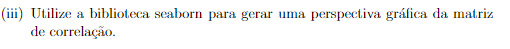

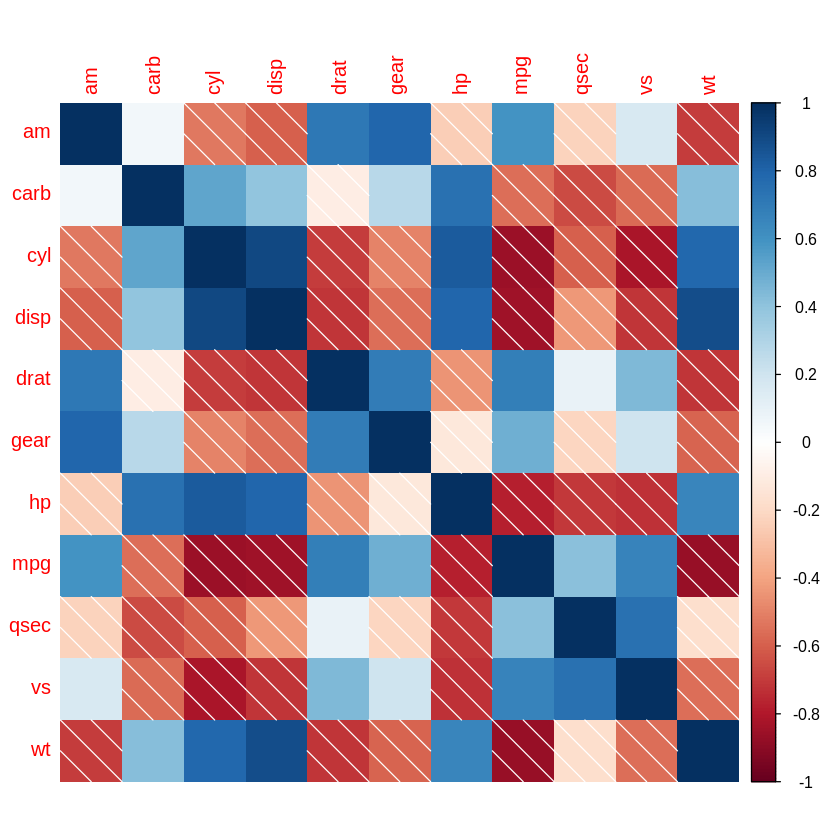

In [24]:
library(corrplot)

corrplot(matriz_de_correlacao, method = 'shade', order = 'alphabet')

É utilizado a biblioteca corrplot já que não existe a seaborn no R, nela existe a função corrplot que com o argumento method = 'shade' faz a mesma coisa que a seaborn do python.

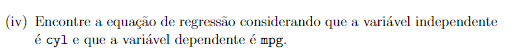

In [25]:
dados <- mtcars

modelo <- lm(mpg ~ cyl, data = dados)


A função lm é utilizada para fazer a regressão linear e recebe como argumento qual é a variável dependente e independente e depois recebe a base de dados.

image.png

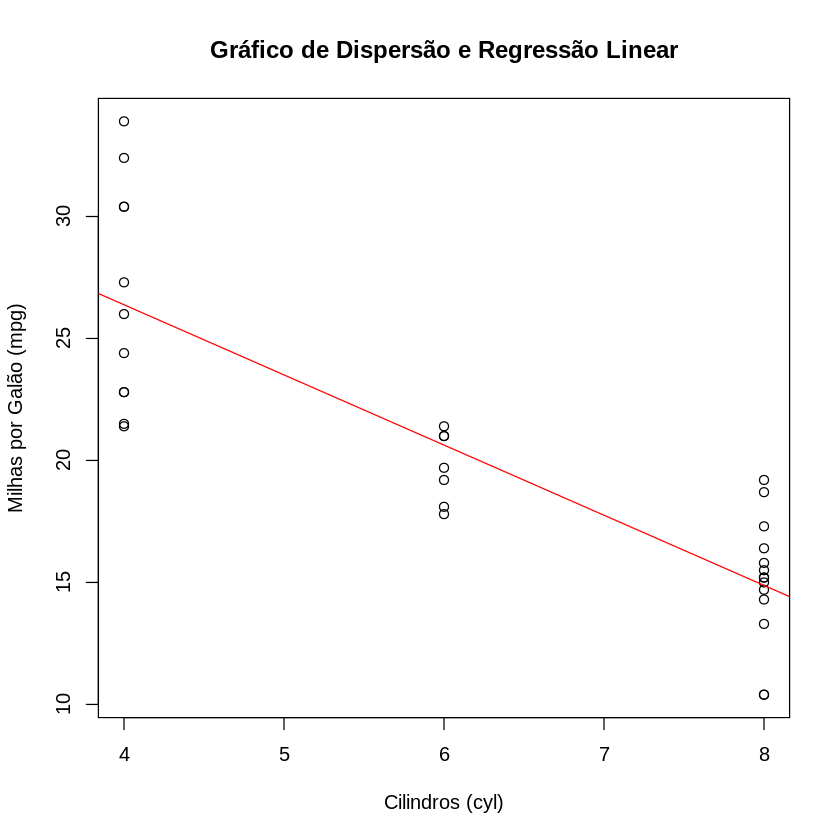

In [26]:
plot(dados$cyl, dados$mpg, main = "Gráfico de Dispersão e Regressão Linear",
     xlab = "Cilindros (cyl)", ylab = "Milhas por Galão (mpg)")

abline(modelo, col = "red")


É utilizado a função plot para criar um gráfico de cyl x mpg e a função abline para criar a linha no gráfico utilizando o resultado encontrado na questão anterior.

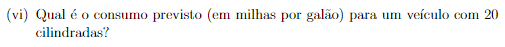

In [27]:
novo_dados <- data.frame(cyl = 20)

previsao <- predict(modelo, novo_dados)

cat("Consumo previsto para um veículo com 20 cilindradas:", previsao, "milhas por galão\n")

Consumo previsto para um veículo com 20 cilindradas: -19.63123 milhas por galão


É utilizado a função predict para fazer essa previsão de quanto seria com 20 cilindradas, recebendo a regressão linear e o dataframe com o cyl = 20